In [2]:
import result_analyse.resultloader
import general.utils as utils
utils.reload()
allrestable=result_analyse.resultloader.get_all_runs_table()


  0%|          | 0/585 [00:00<?, ?it/s]

File test can not import!
File 0-wardpaper-b can not import! 'accuracy'
File 0-wardpaper-a can not import! 'accuracy'


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import constants
print('select columns to filter')
def res(**filter):
	global allfilters
	allfilters=filter
	global filter_restable
	filter_restable=allrestable.copy()
	for k in filter:
		if filter[k]:
			filter_restable=filter_restable.loc[filter_restable[k].astype(str)==filter[k]]
	print(f'total data are={len(filter_restable)}, the first three rows are:')
	display(filter_restable.iloc[0:3])
	
	
params={}
ignore_columns=['fold','runname','accuracy', 'precision', 'recall', 'f1',
        'dataset_path', 'run_date',
        'classifier_metric',
       'classifier_metric_params', 'event_metric', 'event_metric_params','type']
       
for c in allrestable.columns.drop(ignore_columns):
	
	
	up=list(allrestable[c].dropna().astype(str).unique())
	
	if(len(up)<=1):continue
	# if(par=='name'):continue
	up.insert(0,'')
	params[c]=up
	
w=interact(res,**params)

2022-08-19 10:24:59.552561: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


select columns to filter


interactive(children=(Dropdown(description='split', options=('', 'train', 'test'), value=''), Dropdown(descrip…

# Aggregated Table

In [9]:
restable=filter_restable.copy()

# restable=restable.loc[restable.evalution=="KFoldEval"]
# restable.strategy.loc[restable.strategy.str.contains("FastFinder")]='FastFinder'
# restable.strategy.loc[restable.segmentor=="Probabilistic"]='SimpleStrategy'
# restable=restable.loc[restable.strategy =='SimpleStrategy']#FastFinder
# restable=restable.loc[restable.strategy =='FastFinder']#FastFinder
# print(len(restable),len(allrestable))
# res2=restable.groupby(['run_date','dataset','featureExtractor','featureExtractor_params','strategy','segmentor','segmentor_params','type']).mean()
restable['segmentor_params']=restable['segmentor_params'].astype(str)
# res2=restable.groupby(['split','run_date','dataset','segmentor','segmentor_params','type']).mean()
res2=restable
# display(res2)
#res2.groupby(['dataset','runname','type']).std()
from IPython.display import display
# 'segmentor_params'
import pandas as pd
import numpy as np
def calccell(item):
    if np.isnan(item['mean']):
        return 'nan'
    if np.isnan(item['std']):
        item['std']=0
    return ('%d±%d')%(item['mean'],item['std'])
res3=res2.groupby(['split','dataset','segmentor','segmentor_params','type']).agg({'accuracy':['mean','std'],'precision':['mean','std'],'recall':['mean','std'],'f1':['mean','std','count']})*100#.round(2)

alllist={}
for k,v in res3.iterrows():
    key=k[0:len(k)-1]
    if not(key in alllist):
        alllist[key]={}
    
    alllist[key][k[len(k)-1]+"_acc"]=calccell(v['accuracy'])
    alllist[key][k[len(k)-1]+"_prc"]=calccell(v['precision'])
    alllist[key][k[len(k)-1]+"_tpr"]=calccell(v['recall'])
    alllist[key][k[len(k)-1]+"_f1"]=calccell(v['f1'])
    alllist[key]["count"]=v['f1']['count']/100

df2=pd.DataFrame(alllist).transpose()

display(df2)


classic_acc  \
test  Home2 FixedEventWindow {'size': 10.0, 'shift': 1.0}         56±0   
                             {'size': 2.0, 'shift': 1.0}          56±0   
                             {'size': 20.0, 'shift': 1.0}         56±0   
                             {'size': 20.0, 'shift': 10.0}        52±0   
                             {'size': 20.0, 'shift': 15.0}       54±13   
                             {'size': 20.0, 'shift': 2.0}         54±0   
                             {'size': 20.0, 'shift': 20.0}        21±0   
                             {'size': 20.0, 'shift': 5.0}         53±2   
                             {'size': 3.0, 'shift': 1.0}          56±0   
                             {'size': 3.0, 'shift': 3.0}          50±0   
                             {'size': 30.0, 'shift': 1.0}         53±0   
                             {'size': 30.0, 'shift': 10.0}        31±0   
                             {'size': 30.0, 'shift': 15.0}       45±12   
                             {'size': 30.0, 'shift': 2.0}         56±0   
                             {'size': 30.0, 'shift': 20.0}        27±0   
                             {'size': 30.0, 'shift': 25.0}       37±16   
                             {'size': 30.0, 'shift': 30.0}        50±0   
                             {'size': 30.0, 'shift': 5.0}         54±0   
                             {'size': 4.0, 'shift': 1.0}          63±0   
                             {'size': 4.0, 'shift': 3.0}          47±0   
                             {'size': 40.0, 'shift': 25.0}        51±0   
                             {'size': 40.0, 'shift': 35.0}        54±0   
                             {'size': 40.0, 'shift': 5.0}         56±0   
                             {'size': 5.0, 'shift': 1.0}          64±0   
                             {'size': 5.0, 'shift': 3.0}          57±0   
                             {'size': 5.0, 'shift': 5.0}          52±0   
                             {'size': 6.0, 'shift': 1.0}          66±0   
                             {'size': 6.0, 'shift': 3.0}          52±0   
                             {'size': 6.0, 'shift': 5.0}          56±0   
train Home2 FixedEventWindow {'size': 10.0, 'shift': 1.0}         56±0   
                             {'size': 2.0, 'shift': 1.0}          54±0   
                             {'size': 20.0, 'shift': 1.0}         56±0   
                             {'size': 20.0, 'shift': 10.0}        56±0   
                             {'size': 20.0, 'shift': 15.0}       59±11   
                             {'size': 20.0, 'shift': 2.0}         56±0   
                             {'size': 20.0, 'shift': 20.0}        19±0   
                             {'size': 20.0, 'shift': 5.0}         60±1   
                             {'size': 3.0, 'shift': 1.0}          51±0   
                             {'size': 3.0, 'shift': 3.0}          46±0   
                             {'size': 30.0, 'shift': 1.0}         65±0   
                             {'size': 30.0, 'shift': 10.0}        37±0   
                             {'size': 30.0, 'shift': 15.0}       55±14   
                             {'size': 30.0, 'shift': 2.0}         69±0   
                             {'size': 30.0, 'shift': 20.0}        27±0   
                             {'size': 30.0, 'shift': 25.0}       43±12   
                             {'size': 30.0, 'shift': 30.0}        56±0   
                             {'size': 30.0, 'shift': 5.0}         62±0   
                             {'size': 4.0, 'shift': 1.0}          60±0   
                             {'size': 4.0, 'shift': 3.0}          52±0   
                             {'size': 40.0, 'shift': 25.0}        61±0   
                             {'size': 40.0, 'shift': 35.0}        52±0   
                             {'size': 40.0, 'shift': 5.0}         70±0   
                             {'size': 5.0, 'shift': 1.0}          62±0   
                             {'size': 5.0, 'shift': 3.0}       

# display best result base on window size

test-TS-CS       40
test-classic     50
train-TS-CS      38
train-classic    70
dtype: int64

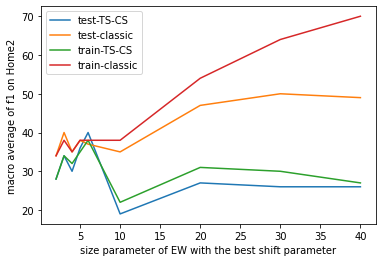

In [10]:
# eval(df2.index.get_level_values(3)[0])
plot_data={}
for row in df2.index:
	slic=row[0]
	dataset=row[1]
	segment=row[2]
	segparm=eval(row[3])
	seg_size=segparm['size']
	seg_shift=segparm['shift']
	# keye=f'{slic}-{dataset}-TS-CS'
	# keyc=f'{slic}-{dataset}-classic'
	keye=f'{slic}-TS-CS'
	keyc=f'{slic}-classic'
	if not keye in plot_data:
		plot_data[keye]={}
		plot_data[keyc]={}
	
	# met='tpr'
	# met='acc'
	met='f1'
	plot_data[keye][(seg_size,seg_shift)]=int(df2.loc[row][f'event_{met}'].split('±')[0])
	plot_data[keyc][(seg_size,seg_shift)]=int(df2.loc[row][f'classic_{met}'].split('±')[0])
	
segmap={'FixedEventWindow':'EW','FixedSlidingWindow':'TW', 'Probablistic': 'DW', 'MetaSeg':'MetaSeg'}

a=pd.DataFrame(plot_data)
from scipy.interpolate import interp1d
b=a.reset_index().rename({'level_0':'size','level_1':'shift'},axis=1)
sizeagg=b.groupby('size').max().drop('shift',axis=1)
shiftagg=b.groupby('shift').max().drop('size',axis=1)
# sizeagg.loc[20.0]=[33,37,41,49]
ax=sizeagg.plot()
ax.set_ylabel(f"macro average of {met} on {allfilters['dataset']}")
ax.set_xlabel(f"size parameter of {segmap[allfilters['segmentor']]} with the best shift parameter")

# shiftagg.plot()
pd.set_option('display.max_rows', None)

a.max()

# display the relationship between window size, shift size and measure

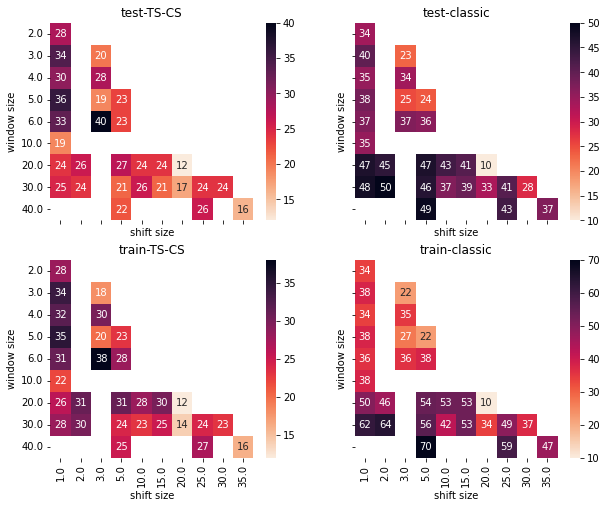

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=a.index.get_level_values(0)
y=a.index.get_level_values(1)

# ax3d = plt.axes(projection='3d')
fig,axs=plt.subplots(len(a.columns)//2,2,sharex=True,sharey=True,figsize=(10,2*len(a.columns)))
axs=axs.reshape(-1)
for i,c in enumerate(a.columns):
	# ax3d.scatter3D(x,y,a[c].values)
	# s=(a[c].values-a[c].values.min())*10
	# ax2d.heatmap(x,y,s=s)
	import seaborn as sns
	data=a[[c]].unstack().droplevel(0,axis=1)
	

	sns.heatmap(data,annot=True,cmap='rocket_r',ax=axs[i])
	axs[i].set_title(c)
	axs[i].set_xlabel('shift size')
	axs[i].set_ylabel('window size')
	
	# a[[c]].heatmap()
# plt.show()
# ax2d = plt.axes()
# for c in a.columns:
# 	# ax3d.scatter3D(x,y,a[c].values)
# 	s=(a[c].values-a[c].values.min())*10
	
# 	ax2d.plot(x,y,s=s)
# a[c].values